In [10]:
from Bio import AlignIO, Phylo
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment, AlignInfo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [6]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/d2/54/26919780384c6dd9c3108c5ca64bbe8af45ce567e2f2493cd0cb8c596b9a/fonttools-4.47.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     -------------------------------------- 160.4/160.4 kB 4.7 MB/s e

In [13]:
aln = AlignIO.read("Alinhamento_DRB1.clustal", "clustal")

print(f'Alignment: \n {aln} \n ################################')



Alignment: 
 Alignment with 6 rows and 266 columns
MVCLKLPGGSCMTALTVTLMVLSSPLALSGDTRPRFLWQPKREC...FLS AAU87979.1
MVCLKLPGGSCMTALTVTLMVLSSPLALSGDTRPRFLWQPKREC...FLS CAD0297767.1
MVCLKLPGGSCMTALTVTLMVLSSPLALSGDTRPRFLWQPKREC...FLS CAD0297754.1
MVCLKLPGGSCMTALTVTLMVLSSPLALAGDTRPRFLWQPKREC...FLS UOA00155.1
MVCLKLPGGSCMTALTVTLMVLSSPLALSGDTRPRFLWQPKREC...FLS NP_002115.2
MVCLKLPGGSCMTALTVTLMVLSSPLALSGDTRPRFLWQPKREC...FLS CAD0297745.1 
 ################################


In [14]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(aln)
print(f'Distance Matrix: \n {dm} \n ################################')

Distance Matrix: 
 AAU87979.1	0
CAD0297767.1	0.007082152974504208	0
CAD0297754.1	0.006373937677053854	0.0049610205527994555	0
UOA00155.1	0.006373937677053854	0.0049610205527994555	0.00425230333097093	0
NP_002115.2	0.004249291784702569	0.0028348688873139904	0.002126151665485465	0.002126151665485465	0
CAD0297745.1	0.006373937677053854	0.005665722379603388	0.004957507082152923	0.004957507082152923	0.0028328611898017497	0
	AAU87979.1	CAD0297767.1	CAD0297754.1	UOA00155.1	NP_002115.2	CAD0297745.1 
 ################################


In [15]:
contructor = DistanceTreeConstructor()

upgma_tree = contructor.upgma(dm)
print(f'UPGMA Tree: \n {upgma_tree} \n ################################')

nj_tree = contructor.nj(dm)
print(f'Neighbor Joining Tree: \n {nj_tree} \n ################################')

Phylo.write(upgma_tree, 'upgma_tree.nwk', 'newick')
Phylo.write(nj_tree, 'nj_tree.nwk', 'newick')

UPGMA Tree: 
 Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(name='Inner4')
            Clade(name='Inner3')
                Clade(name='CAD0297745.1')
                Clade(name='Inner2')
                    Clade(name='Inner1')
                        Clade(name='NP_002115.2')
                        Clade(name='UOA00155.1')
                    Clade(name='CAD0297754.1')
            Clade(name='CAD0297767.1')
        Clade(name='AAU87979.1') 
 ################################
Neighbor Joining Tree: 
 Tree(rooted=False)
    Clade(branch_length=0, name='Inner4')
        Clade(name='Inner3')
            Clade(name='Inner2')
                Clade(name='Inner1')
                    Clade(name='CAD0297745.1')
                    Clade(name='AAU87979.1')
                Clade(name='CAD0297767.1')
            Clade(name='CAD0297754.1')
        Clade(name='UOA00155.1')
        Clade(name='NP_002115.2') 
 ################################


1

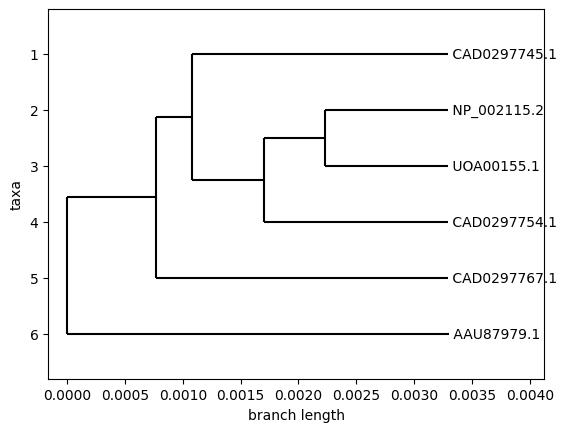

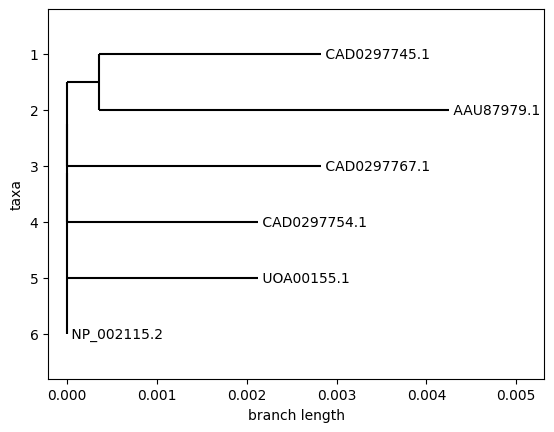

In [16]:
upgmatree = Phylo.read('upgma_tree.nwk', 'newick')
njtree = Phylo.read('nj_tree.nwk', 'newick')

for clade in upgmatree.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

for clade in njtree.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

Phylo.draw(upgmatree)
Phylo.draw(njtree)